# Project - Concrete Strength Prediction

### Abstract: 
Concrete is the most important material in civil engineering. The 
concrete compressive strength is a highly nonlinear function of age and 
ingredients. These ingredients include cement, blast furnace slag, fly ash, 
water, superplasticizer, coarse aggregate, and fine aggregate.

### Problem Statement:

To predict the concrete strength using the data available in file concrete_data.xls. Apply
feature engineering and model tuning to obtain 80% to 95% of R2score.

### Dataset:

Concrete_Data.xls - Available from:

https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/ 

concrete_readme.txt - Available from:

https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Readme.txt


### Attribute Information:

Name -- Data Type -- Measurement -- Description
- Cement (cement) -- quantitative -- kg in a m3 mixture -- Input Variable
- Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input Variable
- Water (water) -- quantitative -- kg in a m3 mixture -- Input Variable
- Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input Variable
- Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input Variable
- Age(age) -- quantitative -- Day (1~365) -- Input Variable
- Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable

### Data Characteristics:
    
- The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. 
- Data is in raw form (not scaled). 

### Summary Statistics: 

- Number of instances (observations): 1030
- Number of Attributes: 9
- Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable
- Missing Attribute Values: None

## Import Necessary Libraries & Format Notebook

In [247]:
# don't show warning messages
import warnings
warnings.filterwarnings("ignore")

# import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import pandas_profiling


from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_validate, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [187]:
# Adjust display and formatting settings
plt.style.use('ggplot')
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_columns', 500)           
pd.set_option('display.max_rows', 500) 

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

## Exploratory Data Analysis

In [41]:
# import dataset (using provided .csv version of data)
df = pd.read_csv('concrete.csv')

In [42]:
# quick look at the first few rows
df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0  141.30 212.00   0.00 203.50          0.00     971.80   748.50   28   
1  168.90  42.20 124.30 158.30         10.80   1,080.80   796.20   14   
2  250.00   0.00  95.70 187.40          5.50     956.90   861.20   28   
3  266.00 114.00   0.00 228.00          0.00     932.00   670.00   28   
4  154.80 183.40   0.00 193.30          9.10   1,047.40   696.70   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [43]:
# shape of dataset
df.shape

(1030, 9)

In [44]:
# data types and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


## Univariate Analysis

In [45]:
# description of attributes for numerical data types / statistical summary
df.describe().transpose()

count   mean    std    min    25%    50%      75%      max
cement       1,030.00 281.17 104.51 102.00 192.38 272.90   350.00   540.00
slag         1,030.00  73.90  86.28   0.00   0.00  22.00   142.95   359.40
ash          1,030.00  54.19  64.00   0.00   0.00   0.00   118.30   200.10
water        1,030.00 181.57  21.35 121.80 164.90 185.00   192.00   247.00
superplastic 1,030.00   6.20   5.97   0.00   0.00   6.40    10.20    32.20
coarseagg    1,030.00 972.92  77.75 801.00 932.00 968.00 1,029.40 1,145.00
fineagg      1,030.00 773.58  80.18 594.00 730.95 779.50   824.00   992.60
age          1,030.00  45.66  63.17   1.00   7.00  28.00    56.00   365.00
strength     1,030.00  35.82  16.71   2.33  23.71  34.45    46.14    82.60

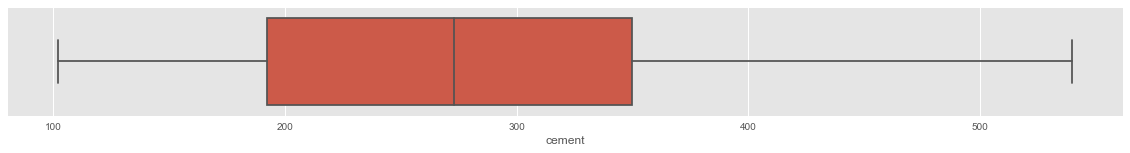

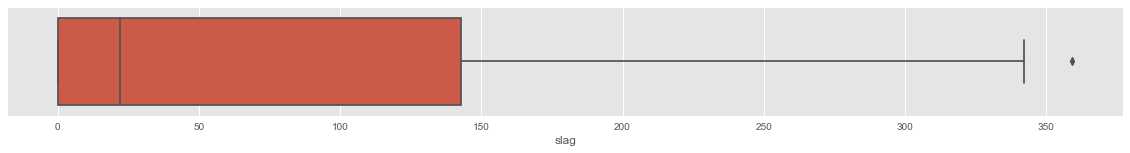

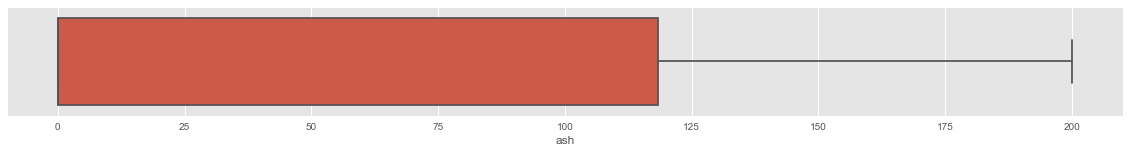

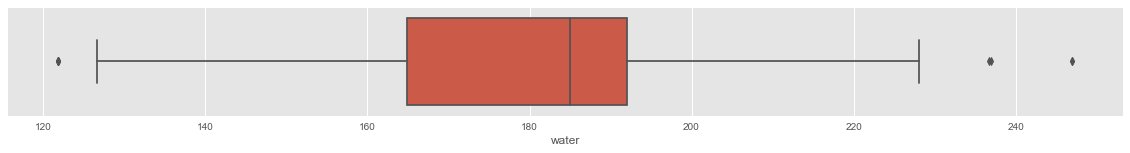

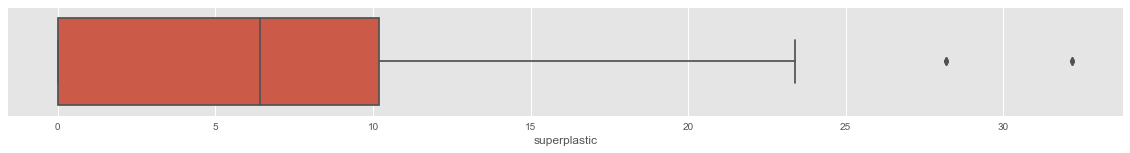

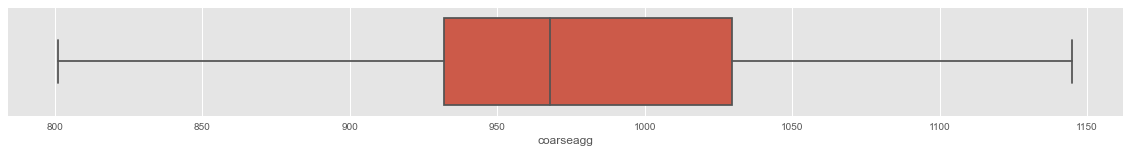

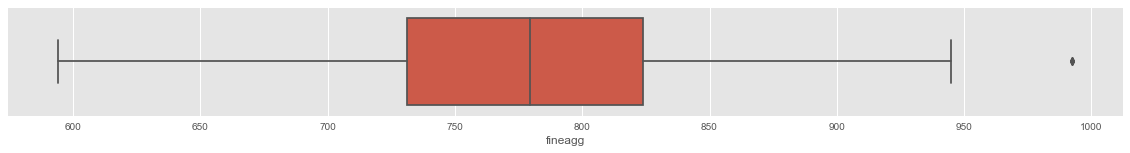

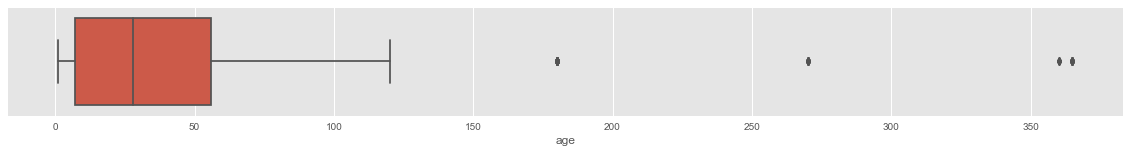

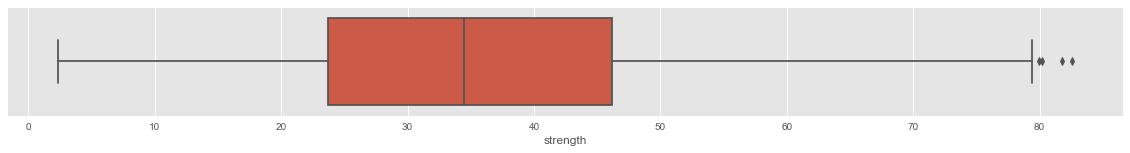

In [46]:
# visualize numerical data distributions with boxplots
for i, col in enumerate(df.columns):
    plt.figure(i, figsize=(20,2))
    sns.boxplot(x=df[col])
    plt.show()

In [47]:
# We will use a Pandas Profiling library to provide a more detailed report of the data
#profile = df.profile_report(style={'full_width':True})           #syntax for older version of pandas_profiling package
profile = df.profile_report(html={'style':{'full_width':True}})    #syntax for v2.6 version of pandas_profiling that works with pandas v1.0+
profile

#### Observations of the Raw Data

- There does not appear to be any missing data.
- There are a high number of "zero" values for some features, however, this is believed to be relevant data and will not be imputed.
- There is some skewness for features such as slag, ash, and superplastic but this appears to be due to the high number of "zero" values for these features.
- Some features do have outliers, most notably, the age (cure time) of the concrete.  We will initially leave this as is, but may consider imputing the outliers to the "max" values if needed.

## Bi-Variate Analysis

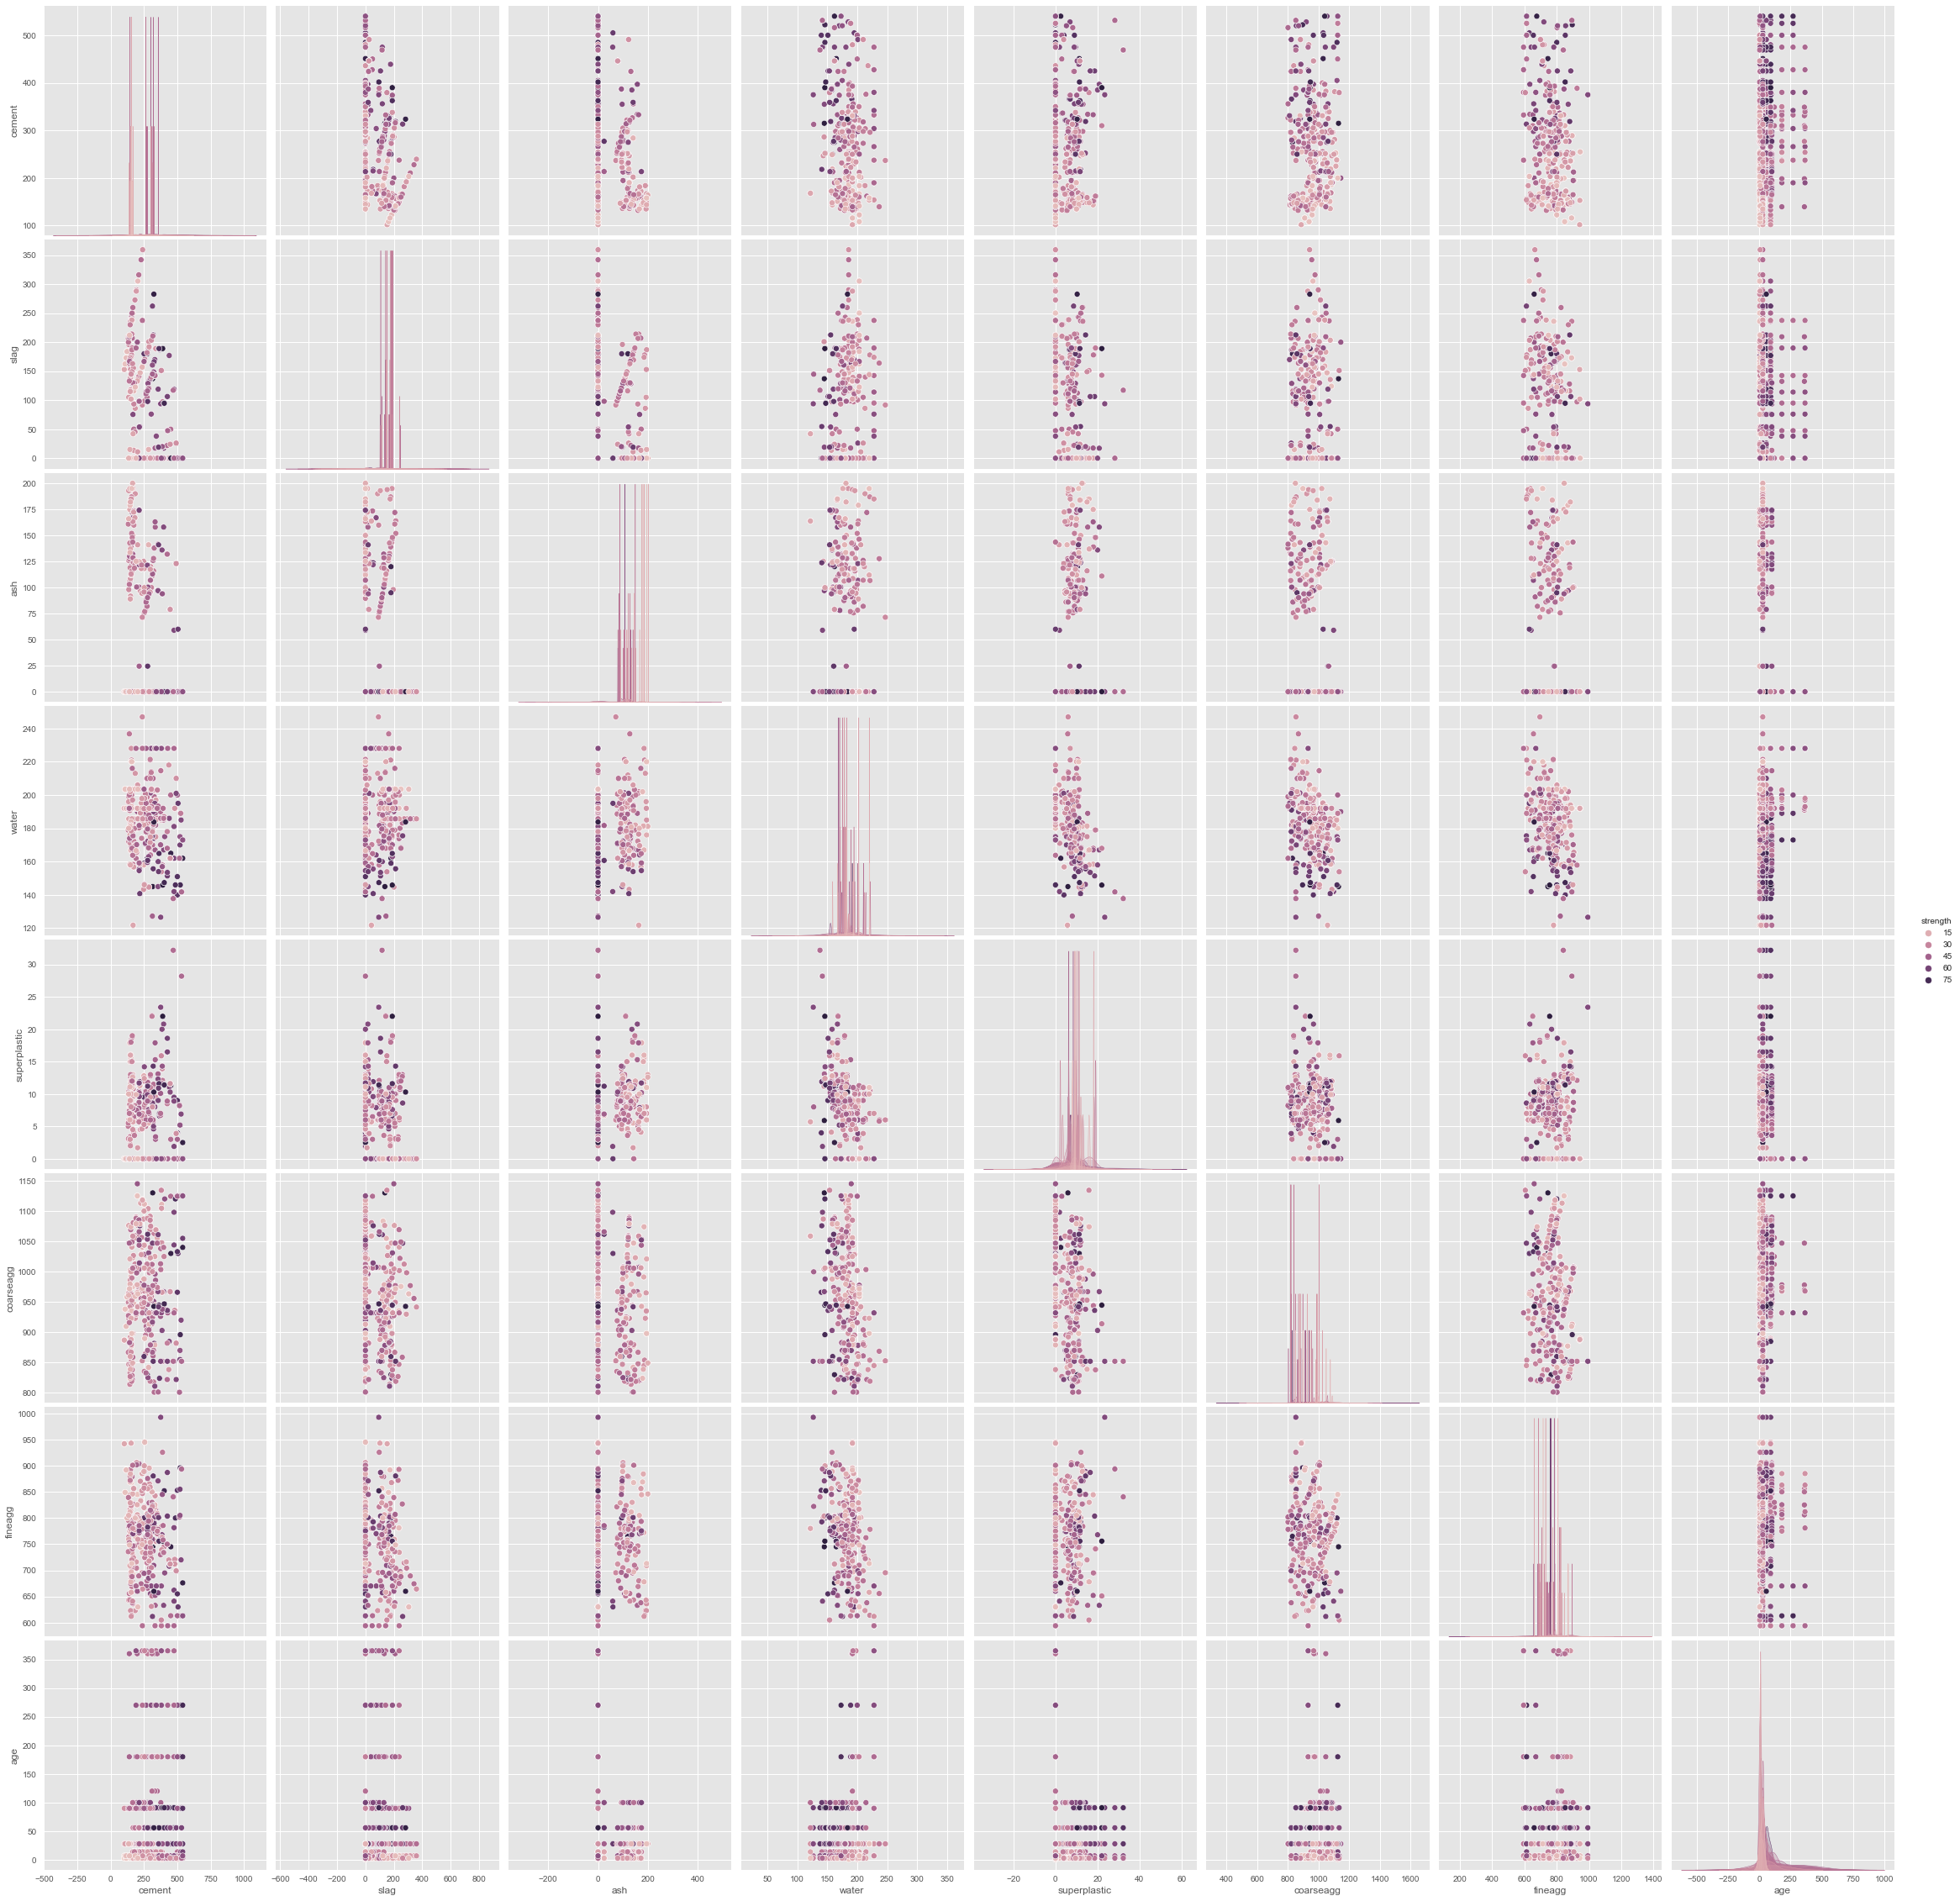

In [26]:
# plot predictor variables and target column (increase size of plots)
sns.pairplot(df, diag_kind= 'kde', hue = 'strength', height=4)
plt.show();

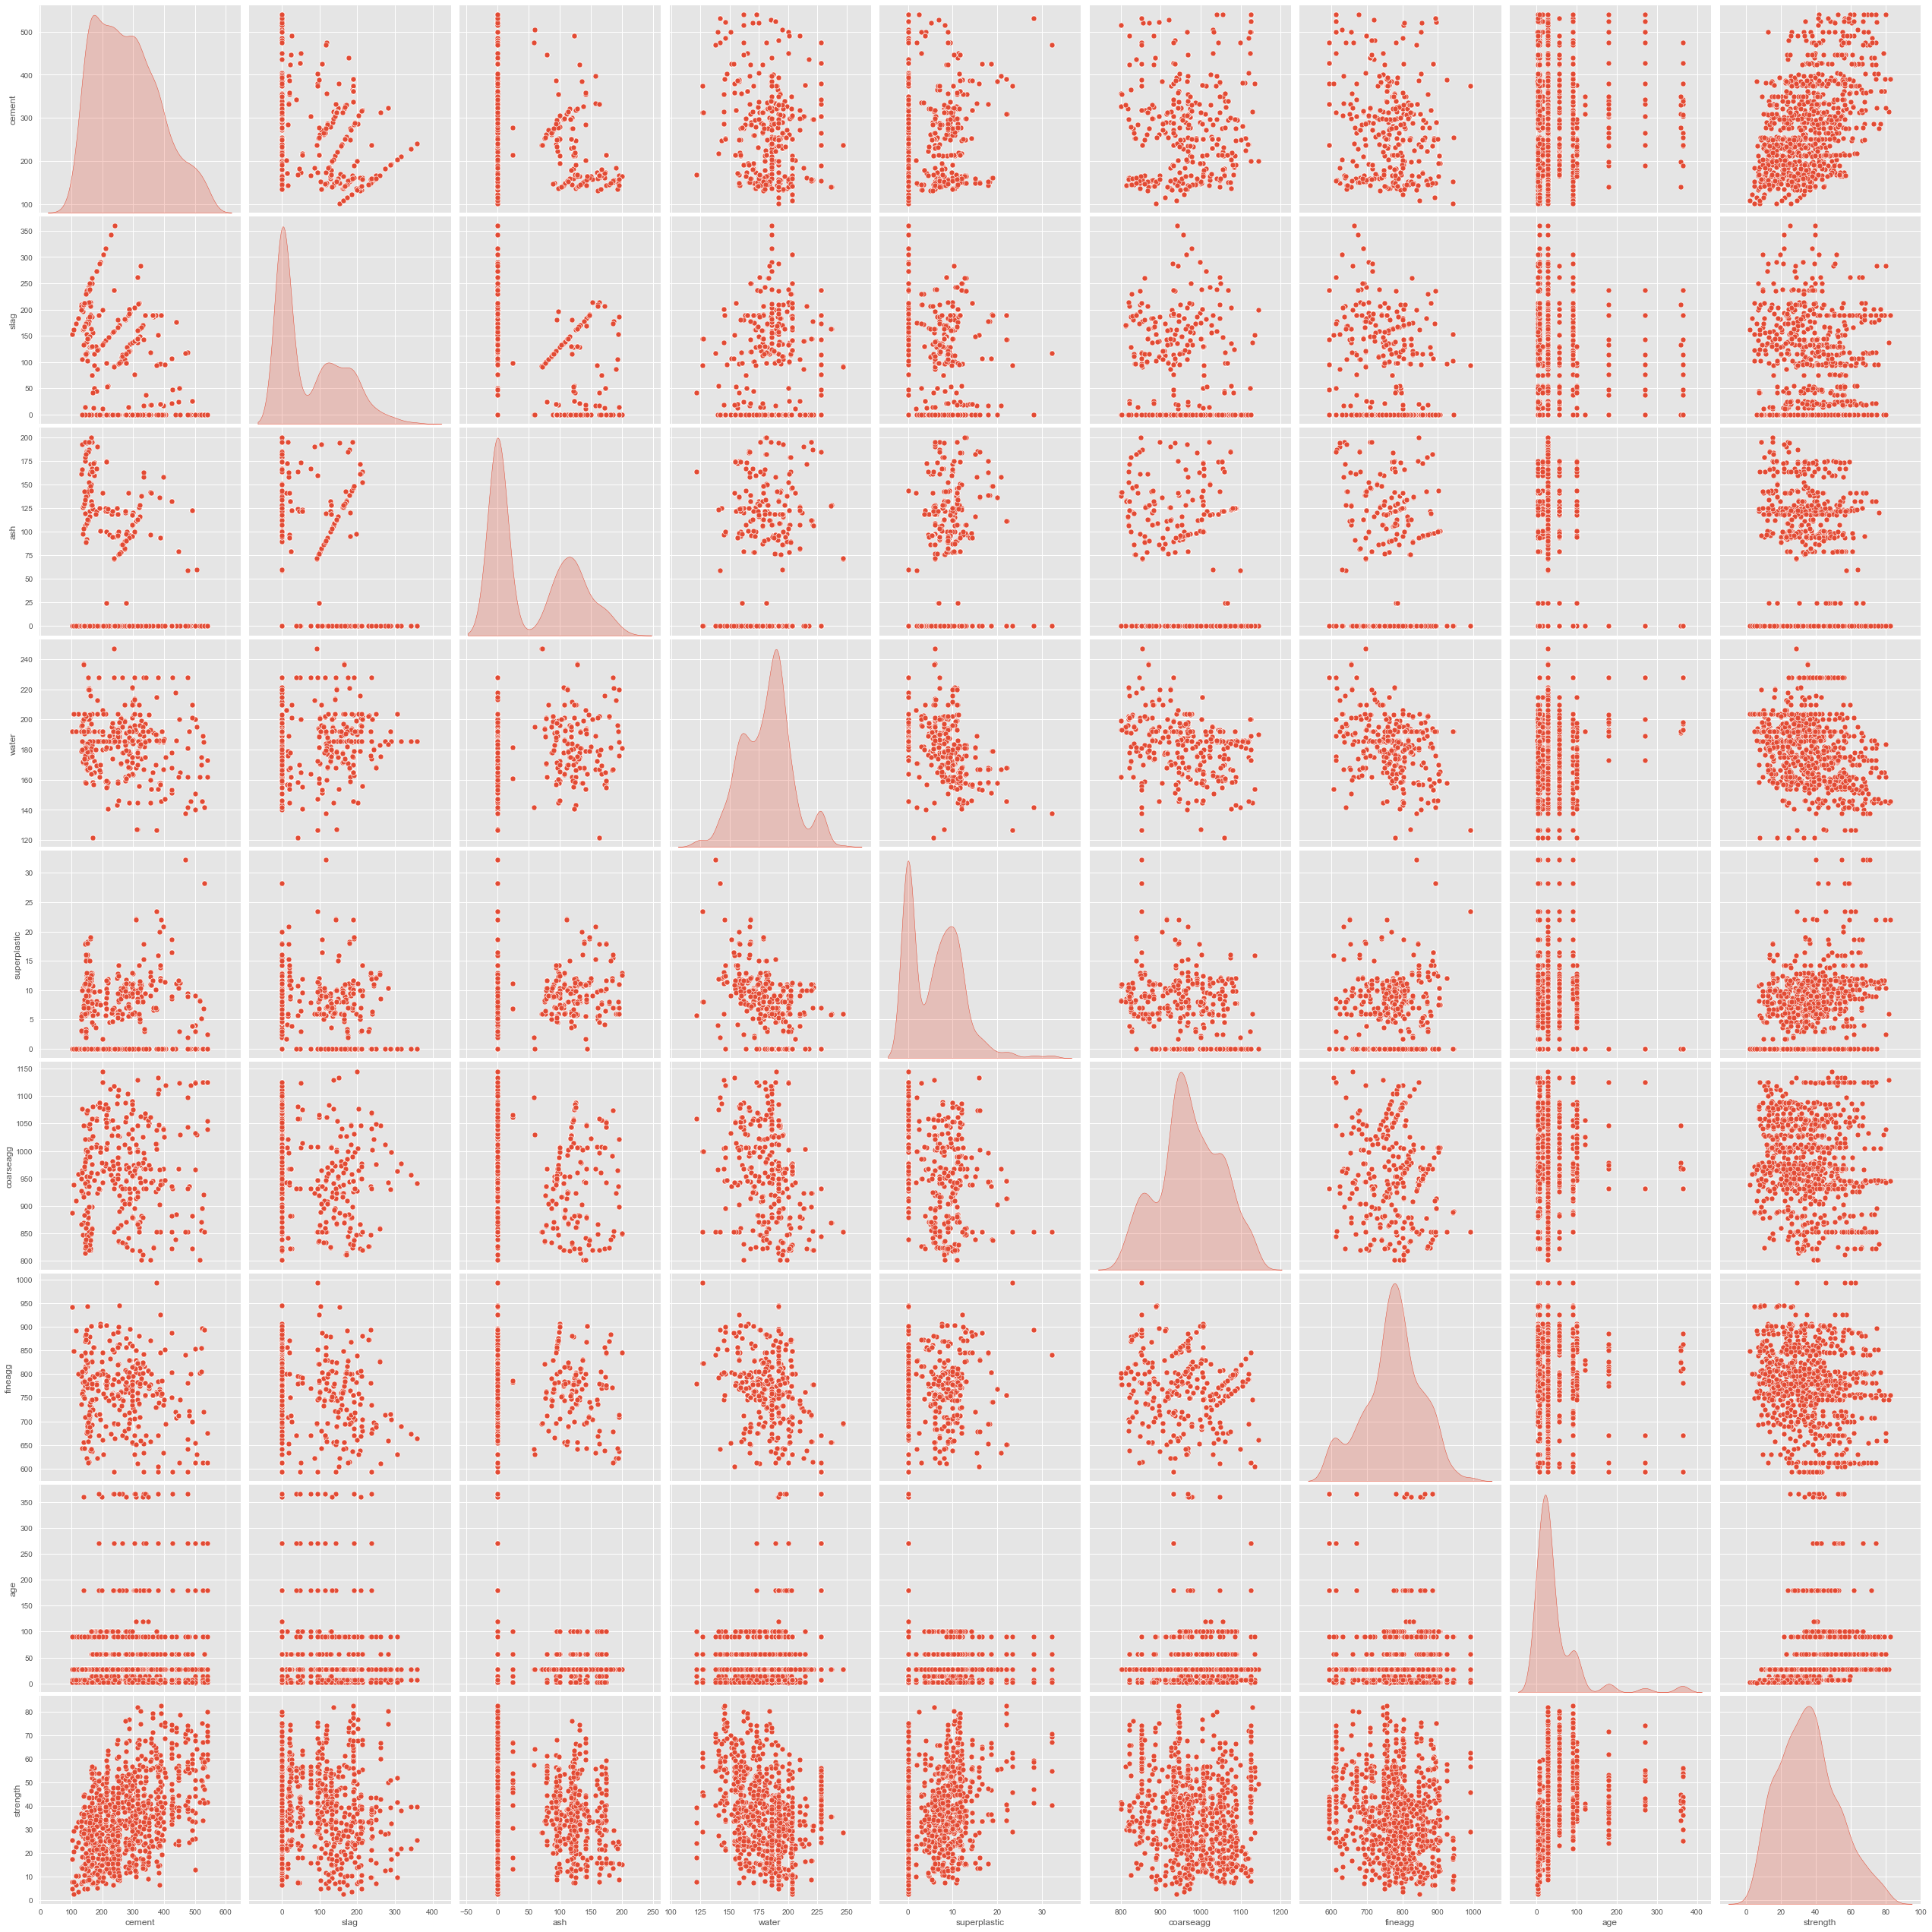

In [32]:
# plot all columns (increase size of  plots)
sns.pairplot(df, diag_kind= 'kde', height=4)
plt.show();

In [34]:
# check correlation in table format
df.corr()

cement  slag   ash  water  superplastic  coarseagg  fineagg  \
cement          1.00 -0.28 -0.40  -0.08          0.09      -0.11    -0.22   
slag           -0.28  1.00 -0.32   0.11          0.04      -0.28    -0.28   
ash            -0.40 -0.32  1.00  -0.26          0.38      -0.01     0.08   
water          -0.08  0.11 -0.26   1.00         -0.66      -0.18    -0.45   
superplastic    0.09  0.04  0.38  -0.66          1.00      -0.27     0.22   
coarseagg      -0.11 -0.28 -0.01  -0.18         -0.27       1.00    -0.18   
fineagg        -0.22 -0.28  0.08  -0.45          0.22      -0.18     1.00   
age             0.08 -0.04 -0.15   0.28         -0.19      -0.00    -0.16   
strength        0.50  0.13 -0.11  -0.29          0.37      -0.16    -0.17   

               age  strength  
cement        0.08      0.50  
slag         -0.04      0.13  
ash          -0.15     -0.11  
water         0.28     -0.29  
superplastic -0.19      0.37  
coarseagg    -0.00     -0.16  
fineagg      -0.16     -0.17  
age           1.00      0.33  
strength      0.33      1.00

#### Observations from Bi-Variate Analysis

- It is difficult to derive correlations from the visual plots.  There does appear to be some linear relationship between "cement" and "strength" and possibly between "superplastic" and "strength."
- However, the correlation matrix and tables suggest that all features have some significance with "cement", "superplastic", "age", and "water" having the highest correlation to "strength".
- Additional domain research suggests that "cement", "age", and "water" have the most significance with "coarseagg" and "fineagg" also contributing significantly to the compressive strength.
- We will keep all features of this dataset initially.

## Prepare Dataset

In [245]:
# Split data into features and target data
X = df.drop(columns = 'strength').copy()
y = df['strength'].copy()

# Split data into train and test data
# **Note: we will use the training set for initial model evaluation and tuning and test final model on our test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Best degree 3 with RMSE 5.854991480789377


Text(0, 0.5, 'RMSE')

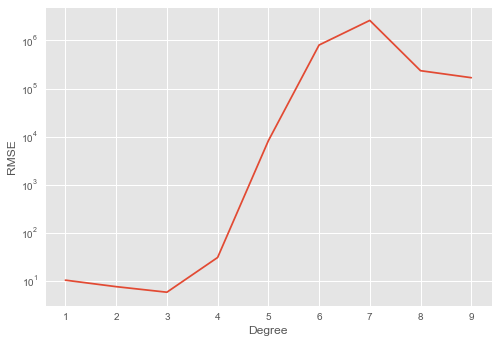

In [248]:
# Examine for higher degree attributes
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(X_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

- We may achieve slightly better accuracy by transforming our data to degree 3 but with greater computational cost.
- We will keep the initial non-transformed dataset and use it for our models initially and check if it meets our target score criteria.

## Create and Evaluate Initial Models

### Initial Setup / Helper Functions

In [223]:
# cross-validation initialization
kfold = KFold(n_splits=10, random_state=1)

### BaggingRegressor Model

In [252]:
# Model without scaling
model = BaggingRegressor(random_state=1)

# Model with data scaling
#model = make_pipeline(StandardScaler(), BaggingRegressor(random_state=1))

# Evaluate model on train data
score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
R2_train = score.mean()

# print the score
print("R2_Train: %.3f" % (R2_train))

R2_Train: 0.894


In [227]:
# Tune model with hyper-parameters

# parameter grid
param_grid = { 'base_estimator': (DummyRegressor(), DecisionTreeRegressor(), KNeighborsRegressor(), SVR(gamma='scale')),
               'n_estimators': (10, 50, 100),
               'bootstrap': (True, False)
             }

# use GridSearchCV for full-grid iteration
gs = GridSearchCV(model, param_grid, cv=kfold)
gs.fit(X_train, y_train)

# score the model
R2_train = gs.score(X_train, y_train)
R2_test  = gs.score(X_test, y_test)

# print the score
print("R2_Train: %.3f  |  R2_Test: %.3f " % (R2_train, R2_test))

# print the best parameters
print()
print("BestParameters:")
print(gs.best_params_)

# record the score
model_scores = {'Model': ['BaggingRegressor'], 
                'R2_Train': R2_train, 
                'R2_Test': R2_test
               }

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame(model_scores)
resultsDf = resultsDf[['Model', 'R2_Train', 'R2_Test']]
resultsDf

R2_Train: 0.984  |  R2_Test: 0.919 

BestParameters:
{'base_estimator': DecisionTreeRegressor(), 'bootstrap': True, 'n_estimators': 100}


Model  R2_Train  R2_Test
0  BaggingRegressor     0.984    0.919

### RandomForestRegressor Model

In [228]:
# Model without scaling
model = RandomForestRegressor(random_state=1)

# Model with data scaling
#model = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=1))

# Evaluate model on train data
score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
R2_train = score.mean()

# print the score
print("R2_Train: %.3f" % (R2_train))

R2_Train: 0.903


In [229]:
# Tune model with hyper-parameters

# parameter grid
param_grid = {'n_estimators': (10, 50, 100),
              'criterion': ('mse', 'mae'),
              'max_features':('auto', 'sqrt', 'log2'),
              'bootstrap': (True, False)}

# use GridSearchCV for full-grid iteration
gs = GridSearchCV(model, param_grid, cv=kfold)
gs.fit(X_train, y_train)

# score the model
R2_train = gs.score(X_train, y_train)
R2_test  = gs.score(X_test, y_test)

# print the score
print("R2_Train: %.3f  |  R2_Test: %.3f " % (R2_train, R2_test))

# print the best parameters
print()
print("BestParameters:")
print(gs.best_params_)

# record the score
resultsDf.loc[1] = ['RandomForestRegressor', R2_train, R2_test]
resultsDf

R2_Train: 0.993  |  R2_Test: 0.930 

BestParameters:
{'bootstrap': False, 'criterion': 'mae', 'max_features': 'log2', 'n_estimators': 50}


Model  R2_Train  R2_Test
0       BaggingRegressor     0.984    0.919
1  RandomForestRegressor     0.993    0.930

### AdaBoostRegressor Model

In [230]:
# Model without scaling
model = AdaBoostRegressor(random_state=1)

# Model with data scaling
#model = make_pipeline(StandardScaler(), AdaBoostRegressor(random_state=1))

# Evaluate model on train data
score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
R2_train = score.mean()

# print the score
print("R2_Train: %.3f" % (R2_train))

R2_Train: 0.782


In [231]:
# Tune model with hyper-parameters

# parameter grid
param_grid = { 'base_estimator': (DummyRegressor(), DecisionTreeRegressor(), KNeighborsRegressor(), SVR(gamma='scale')),
               'n_estimators': (10, 50, 100),
               'loss': ('linear', 'square', 'exponential')
             }

# use GridSearchCV for full-grid iteration
gs = GridSearchCV(model, param_grid, cv=kfold)
gs.fit(X_train, y_train)

# score the model
R2_train = gs.score(X_train, y_train)
R2_test  = gs.score(X_test, y_test)

# print the score
print("R2_Train: %.3f  |  R2_Test: %.3f " % (R2_train, R2_test))

# print the best parameters
print()
print("BestParameters:")
print(gs.best_params_)

# record the score
resultsDf.loc[2] = ['AdaBoostRegressor', R2_train, R2_test]
resultsDf

R2_Train: 0.994  |  R2_Test: 0.909 

BestParameters:
{'base_estimator': DecisionTreeRegressor(), 'loss': 'exponential', 'n_estimators': 10}


Model  R2_Train  R2_Test
0       BaggingRegressor     0.984    0.919
1  RandomForestRegressor     0.993    0.930
2      AdaBoostRegressor     0.994    0.909

### GradientBoostingRegressor Model

In [232]:
# Model without scaling
model = GradientBoostingRegressor(random_state=1)

# Model with data scaling
#model = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=1))

# Evaluate model on train data
score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
R2_train = score.mean()

# print the score
print("R2_Train: %.3f" % (R2_train))

R2_Train: 0.899


In [233]:
# Tune model with hyper-parameters

# parameter grid
param_grid = {'loss': ('ls', 'lad', 'huber' , 'quantile'),
              'n_estimators': (10, 50, 100),
              'criterion': ('friedman_mse', 'mse', 'mae'),
              'max_features':('auto', 'sqrt', 'log2'),
             }

# use GridSearchCV for full-grid iteration
gs = GridSearchCV(model, param_grid, cv=kfold)
gs.fit(X_train, y_train)

# score the model
R2_train = gs.score(X_train, y_train)
R2_test  = gs.score(X_test, y_test)

# print the score
print("R2_Train: %.3f  |  R2_Test: %.3f " % (R2_train, R2_test))

# print the best parameters
print()
print("BestParameters:")
print(gs.best_params_)

# record the score
resultsDf.loc[3] = ['GradientBoostRegressor', R2_train, R2_test]
resultsDf

R2_Train: 0.945  |  R2_Test: 0.904 

BestParameters:
{'criterion': 'friedman_mse', 'loss': 'ls', 'max_features': 'log2', 'n_estimators': 100}


Model  R2_Train  R2_Test
0        BaggingRegressor     0.984    0.919
1   RandomForestRegressor     0.993    0.930
2       AdaBoostRegressor     0.994    0.909
3  GradientBoostRegressor     0.945    0.904

## Results

In [234]:
resultsDf

Model  R2_Train  R2_Test
0        BaggingRegressor     0.984    0.919
1   RandomForestRegressor     0.993    0.930
2       AdaBoostRegressor     0.994    0.909
3  GradientBoostRegressor     0.945    0.904

#### Summary:
- In summary, all of our tuned regressor models met the criteria of an R2Score between .80 to .95.
- The tuned RandomForestRegressor model scored the overall highest score on our test data. 
- Additional performance improvements could probably be achieved by:
    - Adding additional hyperparameters for each model to tune
    - Performing a Random Grid Search on a wider ranges first and then use those results to better range for Grid Search tuning.
    - Try transforming our features to higher degree attributes